In [ ]:
%tensorflow_version 2.x

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory: {0}".format(cwd))

# Change the working directory
os.chdir('/content/drive/MyDrive/2021 생물정보학실습/4. Neural Network/ConsDeepSignaling')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /content
Current working directory: /content/drive/MyDrive/2021 생물정보학실습/4. Neural Network/ConsDeepSignaling


In [3]:
# 필요한한 라이브러리리 설치
!pip install innvestigate simplejson

     |████████████████████████████████| 100 kB 6.4 MB/s 
     |████████████████████████████████| 130 kB 70.4 MB/s 
     |████████████████████████████████| 312 kB 90.2 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.2.4 which is incompatible.


In [4]:
import os
import pickle
import innvestigate
import numpy as np
import pandas as pd
import tensorflow as tf

from keras import Model
from keras.optimizers import Adam
from keras.models import load_model
from gen_matrix import GenMatrix
from parse_file import ParseFile
from load_data import LoadData
from analysis import Analyse
from keras_rand_nn import RandNN, RunRandNN

Using TensorFlow backend.


In [5]:
print('READING DIMS...')
dir_opt = '/datainfo'
train_input_df, input_num, num_feature, rna_df, cpnum_df, num_gene, num_pathway = LoadData(dir_opt).pre_load_train()

matrixA = GenMatrix.feature_gene_matrix(num_feature, num_gene)
matrixB = GenMatrix.gene_pathway_matrix()
print('-----MATRIX A - FEATURES OF GENE SHAPE-----')
print(matrixA.shape)
print('-----MATRIX B - GENE PATHWAY SHAPE-----')
print(matrixB)

READING DIMS...
-----MATRIX A - FEATURES OF GENE SHAPE-----
(2787, 929)
-----MATRIX B - GENE PATHWAY SHAPE-----
[[0. 1. 1. ... 0. 0. 1.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
num_pathway

46

In [7]:
from main import *
#import tensorflow.keras as keras


print('RUNING DEEP NERUAL NETWORK...')

# BUILD NEURAL NETWORK
print('BUILDING CUSTOMED NERUAL NETWORK...')
layer0 = num_pathway # 46개
layer1 = 256
layer2 = 128
layer3 = 32

epoch = 5
batch_size = 256
verbose = 0
learning_rate = 0.001
end_epoch = 5

input_model, gene_model, pathway_model, model = build_rand_nn(matrixA, matrixB,
            num_gene, num_pathway, layer1, layer2, layer3)



RUNING DEEP NERUAL NETWORK...
BUILDING CUSTOMED NERUAL NETWORK...


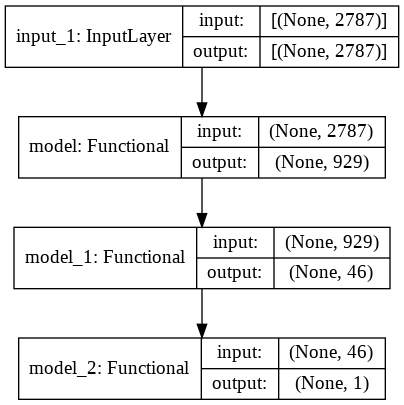

In [8]:
tf.keras.utils.plot_model(model, show_shapes=True)

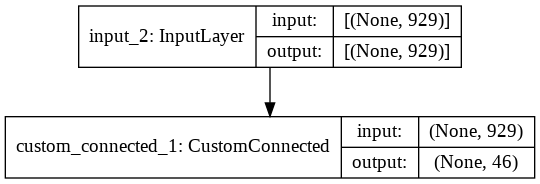

In [9]:
tf.keras.utils.plot_model(gene_model, show_shapes=True)

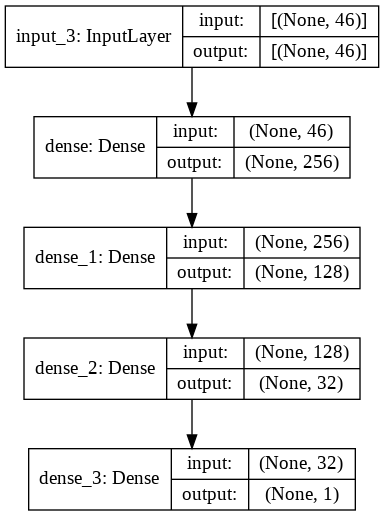

In [10]:
tf.keras.utils.plot_model(pathway_model, show_shapes=True)

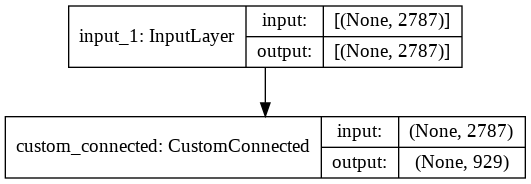

In [11]:
tf.keras.utils.plot_model(input_model, show_shapes=True)

In [12]:
model, history, path = run_rand_nn(model, dir_opt, matrixA, matrixB, 
                                   input_num, epoch, batch_size, verbose, 
                                   learning_rate, end_epoch)

--------------LEARNING RATE: 0.001--------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


  0%|          | 0/5 [00:00<?, ?it/s]

--------------EPOCH: 0 --------------
-----0 to 256-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.2188083827495575
-----256 to 512-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.10134609788656235
-----512 to 768-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.04316752776503563
-----768 to 1024-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.04657204449176788
-----1024 to 1280-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03465687856078148
-----1280 to 1536-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03676779940724373
-----1536 to 1792-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03453998267650604
-----1792 to 2048-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03413640707731247
-----2048 to 2304-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.034957751631736755
-----2304 to 2560-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03661247715353966
-----2560 to 2816-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.034693170338869095
-----2816 to 3072-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.03422791138291359
-----3072 

In [13]:
auto_test_rand_nn(model, dir_opt, verbose, path)

[0.013328357599675655, 0.013328357599675655, 0.0]
                 AUC  Pred Score
AUC         1.000000    0.754466
Pred Score  0.754466    1.000000


In [15]:
import os

print('CONTINUE RUNING DEEP NERUAL NETWORK...')
path = '.' + dir_opt + '/result/epoch_99_No'
os.mkdir(path)

epoch = 50
batch_size = 256
verbose = 0
learning_rate = 0.000001
end_epoch = 149
model, history, path = continue_run_rand_nn(matrixA, matrixB, num_gene, num_pathway, layer1, layer2, layer3, path,
            dir_opt, input_num, epoch, batch_size, verbose, learning_rate, end_epoch)

CONTINUE RUNING DEEP NERUAL NETWORK...


FileNotFoundError: ignored

In [ ]:
batch_size = 256
verbose = 0
learn_schedule_dnn(matrixA, matrixB, num_gene, num_pathway, layer1, layer2, layer3,
            dir_opt, input_num, batch_size, verbose)

RUNING DEEP NERUAL NETWORK...
--------------LEARNING RATE: 0.001--------------


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


  0%|          | 0/29 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
EPOCH MSE LOSS: 0.015045400708913803
-----3328 to 3584-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.008419839665293694
-----3584 to 3840-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.011335894465446472
-----3840 to 4096-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.012048941105604172
-----4096 to 4352-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.012458250857889652
-----4352 to 4608-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.011484509333968163
-----4608 to 4864-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.009179630316793919
-----4864 to 5120-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.012263520620763302
-----5120 to 5376-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.007581822108477354
-----5376 to 5632-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.009530426934361458
-----5632 to 5888-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.010207249782979488
-----5888 to 6144-----
(256, 2787)
(256, 1)
EPOCH MSE LOSS: 0.010568652302026749
-----6144 to 6400----

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


-----0 to 1-----
(1, 2787)
(1, 1)


ValueError: ignored

In [ ]:
auto_test_rand_nn(model, dir_opt, verbose, path)